### Import data

In [1]:
include("importData.jl")
include("DDEmodel.jl")
include("plot.jl")

# import data

# lapatinib
conc_l, pop, g2, g1, g1_0, g2_0 = setup_data("lapatinib");


┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/dde/dde-cons/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/dde/dde-cons/DrugResponseModel.jl/src/importData.jl:37


### Estimate 

In [2]:
# initial guess
initial_guess  = [0.0596124, 0.0331098, 0.005, 0.005, 0.0596124, 0.0331098, 0.005, 0.005,0.0596124,
    0.0331098, 0.005, 0.005, 0.0596124, 0.0331098, 0.005, 0.005, 0.0596124, 0.0331098, 0.005, 0.005,
    0.0596124, 0.0331098, 0.005, 0.005, 0.0596124, 0.0331098, 0.005, 0.005, 0.0596124, 0.0331098, 0.005, 0.005, 25.0, 7.0]

j = 6
times = range(0.0; stop = 95.5, length = 192)

solution = DDEsolve(g1, g2, g1_0, g2_0, initial_guess, j)
solution(times, idxs=2).u


192-element Array{Float64,1}:
 11.583589823855   
 11.650364415252874
 11.717229344409313
 11.784183866501062
 11.851227221754431
 11.918358635289001
 11.985577316959983
 12.052882461199058
 12.120273246853875
 12.187748837026064
 12.255308378907733
 12.322951003616632
 12.390675826029742
  ⋮                
 26.632891458561875
 26.725606752539285
 26.81724938884721 
 26.907918366759713
 26.99771685489616 
 27.08675175786829 
 27.175133287533225
 27.26297453873037 
 27.35039106938331 
 27.437500484854006
 27.524422026441467
 27.611276163922657

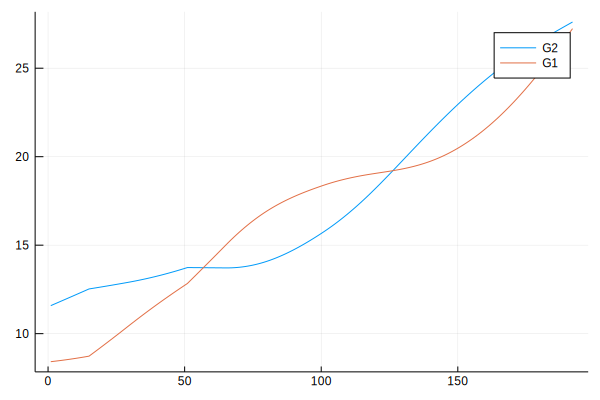

In [3]:
plot(solution(times, idxs=2).u, label = "G2")
plot!(solution(times, idxs=1).u, label="G1")

In [4]:
# bounds 
lower = -8.0*ones(34)
upper = 1.0*ones(32)
append!(upper, [30.0, 20.0])

# max number of steps
num_steps = 1e4
best_fit, parameters = optimization_constantDelay(g1, g2, g1_0, g2_0, initial_guess, lower, upper, num_steps)


ErrorException: Something went wrong. Integrator stepped past tstops but the algorithm was dtchangeable. Please report this error.